In [105]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
import warnings
import json
import tweepy

#Gathering the data

In [106]:
#Reading the file into df
df = pd.read_csv('twitter-archive-enhanced.csv')

#Gathering image-predictions data

In [107]:
#Read image-predictions into df1
df1 = pd.read_csv('image-predictions.tsv',sep='\t')

Assesing the data

In [108]:
#Viewing first 15 rows 
df.head(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [109]:
#View the info of  the twitter_archieve_enhanced
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [110]:
#veiwing the desriptive statitics 
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#Asesing image-predictions data

In [111]:
#viewing first 5 rows of dataframe
df1.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [112]:
#view info of image_predictions dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [113]:
#veiwing the descriptive statitics
df1.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [125]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [115]:
from tweepy.auth import OAuthHandler

consumer_key = 'xxxxxxxx'
consumer_secret = 'xxxxxxxxxxx'
access_token = 'xxxxxxxx'
access_secret = 'xxxxxxxxxxxx'
auth = tweepy.OAuthHandler('xxxxxxxxxxx', 'xxxxxxxx')
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
# For loop which will add each available tweet to a new line of tweet_json.txt
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 545
Rate limit reached. Sleeping for: 546


In [116]:

#reading json file and storing into list
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [194]:

# pandas dataframe
tweet_df = pd.DataFrame()

In [195]:
# selected variables into dataframe
tweet_df['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [196]:
tweet_df.head(4)

,id,retweet_count,favorite_count
0,892177421306343426,6151,32681
1,891815181378084864,4070,24593
2,891689557279858688,8463,41432
3,891327558926688256,9166,39609


In [197]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4678 entries, 0 to 4677
Data columns (total 3 columns):
id                4678 non-null int64
retweet_count     4678 non-null int64
favorite_count    4678 non-null int64
dtypes: int64(3)
memory usage: 109.7 KB


In [198]:
tweet_df.describe()

,id,retweet_count,favorite_count
count,4.678000e+03,4678.000000,4678.000000
mean,7.421558e+17,2931.024369,7961.056862
std,6.826734e+16,4939.782096,12334.275357
min,6.660209e+17,0.000000,0.000000
25%,6.783361e+17,589.000000,1376.000000
50%,7.186133e+17,1366.500000,3463.000000
75%,7.986926e+17,3415.000000,9755.750000
max,8.924206e+17,83751.000000,164446.000000


#Cleaning

#cleaning the text column which contains '&amp' instead of '&'

In [200]:
# View rows in twitter_archive which contain '&amp;' instead of '&' in 'text' coludf
df[df.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Indie. She's not a fan of baths but she's definitely a fan of hide &amp; seek. 12/10 click the link to help Indie\n\nhttps://t.co/fvGkIuAlFK https://t.co/kiCFtmJd7l,NaN,NaN,NaN,"https://www.gofundme.com/get-indie-home/,https://twitter.com/dog_rates/status/842765311967449089/photo/1,https://twitter.com/dog_rates/status/842765311967449089/photo/1",12,10,Indie,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe",NaN,NaN,NaN,https://twitter.com/dog_rates/status/834458053273591808/photo/1,12,10,Chester,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Say hello to Eugene &amp; Patti Melt. No matter how dysfunctional they get, they will never top their owners. Both 12/10 would pet at same time https://t.co/jQUdvtdYMu",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1",12,10,Eugene,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409219559425/photo/1,9,10,Beau,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Roosevelt. He's preparing for takeoff. Make sure tray tables are in their full pupright &amp; licked position\n11/10 https://t.co/7CQkn3gHOQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264096874500/photo/1,11,10,Roosevelt,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,None,

In [202]:
df[df.tweet_id == 786709082849828864]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None


In [203]:
#sorting names
df.name.sort_values()

1035    Abby        
1021    Abby        
938     Ace         
1933    Acro        
1327    Adele       
1934    Aiden       
77      Aja         
480     Akumi       
820     Al          
875     Albert      
1954    Albert      
144     Albus       
412     Albus       
1115    Aldrick     
2046    Alejandro   
374     Alexander   
1189    Alexanderson
486     Alf         
2238    Alfie       
661     Alfie       
367     Alfie       
1616    Alfie       
858     Alfie       
51      Alfy        
201     Alice       
1701    Alice       
1495    Amber       
1334    Ambrose     
2078    Amy         
2195    Amélie      
         ...        
852     my          
988     not         
335     not         
1747    officially  
1206    old         
993     one         
1936    one         
924     one         
369     one         
2326    quite       
169     quite       
118     quite       
193     quite       
2030    space       
22      such        
2345    the         
2346    the  

In [204]:

# View number of entries for each source
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [205]:
#view the name starts with a 
df.loc[(df['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog

In [206]:
# View rows where the value of 'name' is lowercase same as above  and the word 'named' appears in the 'text' column which indicates 
# there is an actual dog name in the text
df.loc[(df['name'].str.islower()) & (df['text'].str.contains('named'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,a,None,None,None,None
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673636718965334016/photo/1,10,10,a,None,None,None,None
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11,10,a,None,None,None,None
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671147085991960577/photo/1,9,10,a,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002554466305/photo/1,9,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874861563904/photo/1,9,10,a,None,None,None,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360680108032/photo/1,9,10,a,None,None,None,None
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10,10,a,None,None,None,None
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461267722241/photo/1,10,10,a,None,None,None,None
2191,668955713004314625,NaN,NaN,2015-11-24 00:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Slovakian Helter Skelter Feta named Leroi. Likes to skip on roofs. Good traction. Much balance. 10/10 wow!

In [207]:

# View row where dog name is 'O'  
df[df.name == "O"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,None,None,None,None


In [208]:
#disable warnings
warnings.simplefilter('ignore')

In [209]:
df.loc[(df[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377

In [210]:
# View rows where text column contains any special symbols
df[df.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [211]:
# View row of specific tweet using tweet_id of a tweet that doesn't have a rating df
df[df.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None


Quality
1)tweets with no image
2)Dataset contains retweets
3)Contents of 'text' cutoff
4)Incorrect dog names
5)Missing values in 'name'
6)Rating numerators with decimals not showing full float
7)Tweet with more than one #/# sometimes have the first occurence erroneously used for the rating numerators and denominators
9)Extra characters after '&'
10)Sources difficult to read
11)Erroneous datatypes (timestamp, source, dog stages, tweet_id, in_reply_to_status_id, in_reply_to_user_id)
Tidiness
1)Dog "stage" variable in four columns: doggo, floofer, pupper, puppo
2)merge image_perdictions and tweet_df into twitter_archive




Cleaning

In [212]:
# create the copies of dataframe
twitter_archive_copy = df.copy()
image_predictions_copy = df1.copy()
tweet_df_copy = tweet_df.copy()
tweet_df_copy.head(2)

,id,retweet_count,favorite_count
0,892177421306343426,6151,32681
1,891815181378084864,4070,24593


In [214]:
tweet_df_copy[tweet_df_copy.id==786709082849828864]

,id,retweet_count,favorite_count
682,786709082849828864,6681,19476
3021,786709082849828864,6679,19475


In [215]:
df.loc[(df[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377

Define
Create dog stage variable and remove individual dog stage columns.

In [216]:
# Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column when available 
twitter_archive_copy['dog_stage'] = twitter_archive_copy['text'].str.extract('(puppo|pupper|floofer|doggo)',expand= True)

In [217]:

# Dropping the columns puppo,pupper,floofer,doggo
columns =['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_copy = twitter_archive_copy.drop(columns, axis=1)

In [218]:
twitter_archive_copy['dog_stage'] = twitter_archive_copy['dog_stage'].replace(["puppo","pupper","floofer","doggo"], "multiple")

In [219]:
#test
twitter_archive_copy.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a colle

#Define
Add image_predictions to twitter_archive

In [147]:
#twitter_archive_copy = twitter_archive_copy.merge(image_predictions_copy, on='tweet_id',  how='inner')

In [220]:

twitter_archive_copy = pd.merge(left=twitter_archive_copy, right=tweet_df_copy, left_on='tweet_id', right_on='id', how='inner')

In [221]:
twitter_archive_copy = twitter_archive_copy.merge(image_predictions_copy, on='tweet_id', how='inner')

In [222]:
twitter_archive_copy = twitter_archive_copy.drop('id', axis=1)

In [223]:
#test
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4132 entries, 0 to 4131
Data columns (total 27 columns):
tweet_id                      4132 non-null int64
in_reply_to_status_id         46 non-null float64
in_reply_to_user_id           46 non-null float64
timestamp                     4132 non-null object
source                        4132 non-null object
text                          4132 non-null object
retweeted_status_id           150 non-null float64
retweeted_status_user_id      150 non-null float64
retweeted_status_timestamp    150 non-null object
expanded_urls                 4132 non-null object
rating_numerator              4132 non-null int64
rating_denominator            4132 non-null int64
name                          4132 non-null object
dog_stage                     676 non-null object
retweet_count                 4132 non-null int64
favorite_count                4132 non-null int64
jpg_url                       4132 non-null object
img_num                       4132 

In [224]:
#remonving rows with no image
twitter_archive_copy = twitter_archive_copy.dropna(subset=['expanded_urls'])

In [225]:
#test
sum(twitter_archive_copy['expanded_urls'].isnull())

0

#Removing retweets

In [154]:
#Firstly making retweeted_status_id to null

In [226]:
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy['retweeted_status_id'].isnull()]

In [227]:
#test
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 4131
Data columns (total 27 columns):
tweet_id                      3982 non-null int64
in_reply_to_status_id         46 non-null float64
in_reply_to_user_id           46 non-null float64
timestamp                     3982 non-null object
source                        3982 non-null object
text                          3982 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 3982 non-null object
rating_numerator              3982 non-null int64
rating_denominator            3982 non-null int64
name                          3982 non-null object
dog_stage                     652 non-null object
retweet_count                 3982 non-null int64
favorite_count                3982 non-null int64
jpg_url                       3982 non-null object
img_num                       3982 non-nu

In [228]:
#dropping retweets
columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

In [229]:
twitter_archive_copy = twitter_archive_copy.drop(columns,axis=1)

In [230]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 4131
Data columns (total 24 columns):
tweet_id                 3982 non-null int64
in_reply_to_status_id    46 non-null float64
in_reply_to_user_id      46 non-null float64
timestamp                3982 non-null object
source                   3982 non-null object
text                     3982 non-null object
expanded_urls            3982 non-null object
rating_numerator         3982 non-null int64
rating_denominator       3982 non-null int64
name                     3982 non-null object
dog_stage                652 non-null object
retweet_count            3982 non-null int64
favorite_count           3982 non-null int64
jpg_url                  3982 non-null object
img_num                  3982 non-null int64
p1                       3982 non-null object
p1_conf                  3982 non-null float64
p1_dog                   3982 non-null bool
p2                       3982 non-null object
p2_conf                  3982

display full text 


In [231]:
#increasing the width of column
pd.set_option('display.max_colwidth', -1)

In [232]:
twitter_archive_copy.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2040,713175907180089344,NaN,NaN,2016-03-25 01:29:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Opie and Clarkus. Clarkus fell asleep so Opie buried him. Ruthless af 10/10 for both https://t.co/xT7XaY4gnW,https://twitter.com/dog_rates/status/713175907180089344/photo/1,10,10,Opie,...,1,timber_wolf,0.503788,False,malamute,0.430624,True,Siberian_husky,0.028454,True
243,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,...,1,Lakeland_terrier,0.275242,True,Airedale,0.190569,True,teddy,0.102595,False
3147,675706639471788032,NaN,NaN,2015-12-12 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,https://twitter.com/dog_rates/status/675706639471788032/photo/1,10,10,a,...,1,English_springer,0.990300,True,Welsh_springer_spaniel,0.002080,True,cocker_spaniel,0.002014,True
487,835172783151792128,NaN,NaN,2017-02-24 17:01:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please don't send in any non-canines like this Floppy Tongued House Panda. Thank you... 12/10 would still pet https://t.co/8fX2VkExnL,"https://twitter.com/dog_rates/status/835172783151792128/photo/1,https://twitter.com/dog_rates/status/835172783151792128/photo/1",12,10,None,...,2,Border_collie,0.663138,True,collie,0.152494,True,Cardigan,0.035471,True
2900,680191257256136705,NaN,NaN,2015-12-25 01:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a sleepy Christmas pupper 11/10 https://t.co/KXg0f8GNQ9,https://twitter.com/dog_rates/status/680191257256136705/photo/1,11,10,None,...,1,Brittany_spaniel,0.733253,True,Welsh_springer_spaniel,0.251634,True,English_springer,0.009243,True


#rename dog names correctly


In [233]:
#assigning all the name in lower case and are wrongly named
named_as_name = twitter_archive_copy.loc[(twitter_archive_copy['name'].str.islower()) & (twitter_archive_copy['text'].str.contains('named'))]
nameis_as_name = twitter_archive_copy.loc[(twitter_archive_copy['name'].str.islower()) & (twitter_archive_copy['text'].str.contains('name is'))]
name_lowercase = twitter_archive_copy.loc[(twitter_archive_copy['name'].str.islower())]

#putting names in list
named_as_name_list = named_as_name['text'].tolist()
nameis_as_name_list = nameis_as_name['text'].tolist()
name_lowercase_list = name_lowercase['text'].tolist()

#Replace lowercase named using loop
for entry in named_as_name_list:
    mask = twitter_archive_copy.text == entry
    name_column = 'name'
    twitter_archive_copy.loc[mask, name_column] = re.findall(r"named\s(\w+)", entry)

#Replace lowercase nameis as name using loop
for entry in nameis_as_name_list:
    mask = twitter_archive_copy.text == entry
    name_column = 'name'
    twitter_archive_copy.loc[mask, name_column] = re.findall(r"name is\s(\w+)", entry)  

#Replace lowercase name with 'None'
for entry in name_lowercase_list:
    mask = twitter_archive_copy.text == entry
    name_column = 'name'
    twitter_archive_copy.loc[mask, name_column] = "None"


In [234]:
#replace 'O' with "O'Malley"
twitter_archive_copy.name = twitter_archive_copy.name.replace("O","O'Malley")

Test


In [235]:
twitter_archive_copy.name.sort_values()


1682    Abby     
1660    Abby     
1661    Abby     
1683    Abby     
1524    Ace      
1525    Ace      
3298    Acro     
3299    Acro     
2207    Adele    
2206    Adele    
3301    Aiden    
3300    Aiden    
130     Aja      
131     Aja      
756     Akumi    
757     Akumi    
1317    Al       
1316    Al       
1413    Albert   
3338    Albert   
3339    Albert   
1412    Albert   
647     Albus    
646     Albus    
237     Albus    
236     Albus    
1826    Aldrick  
1827    Aldrick  
3520    Alejandro
3521    Alejandro
          ...    
75      Yogi     
76      Yogi     
982     Yogi     
983     Yogi     
2217    Zara     
2216    Zara     
3836    Zeek     
3837    Zeek     
874     Zeke     
875     Zeke     
295     Zeke     
294     Zeke     
33      Zeke     
34      Zeke     
2003    Zeus     
2002    Zeus     
1845    Ziva     
1844    Ziva     
1568    Zoe      
1569    Zoe      
189     Zoey     
3711    Zoey     
3710    Zoey     
16      Zoey     
15      Zo

In [236]:
twitter_archive_copy.loc[(twitter_archive_copy['name'].str.islower())]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [237]:
twitter_archive_copy[twitter_archive_copy.name == "O'Malley"]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1236,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O'Malley,...,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True
1237,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O'Malley,...,1,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True


In [242]:
#dataframe_copy = twitter_archive_copy.copy()
#dataframe_copy['ratio'] = dataframe_copy['rating_numerator']/dataframe_copy['rating_denominator']

In [251]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 4131
Data columns (total 24 columns):
tweet_id                 3982 non-null int64
in_reply_to_status_id    46 non-null float64
in_reply_to_user_id      46 non-null float64
timestamp                3982 non-null object
source                   3982 non-null object
text                     3982 non-null object
expanded_urls            3982 non-null object
rating_numerator         3982 non-null int64
rating_denominator       3982 non-null int64
name                     3982 non-null object
dog_stage                652 non-null object
retweet_count            3982 non-null int64
favorite_count           3982 non-null int64
jpg_url                  3982 non-null object
img_num                  3982 non-null int64
p1                       3982 non-null object
p1_conf                  3982 non-null float64
p1_dog                   3982 non-null bool
p2                       3982 non-null object
p2_conf                  3982

In [252]:
# Change datatype of rating_numerator and denominator to float
twitter_archive_copy['rating_numerator'] = twitter_archive_copy['rating_numerator'].astype('float')
twitter_archive_copy['rating_denominator'] = twitter_archive_copy['rating_denominator'].astype('float')

In [253]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 4131
Data columns (total 24 columns):
tweet_id                 3982 non-null int64
in_reply_to_status_id    46 non-null float64
in_reply_to_user_id      46 non-null float64
timestamp                3982 non-null object
source                   3982 non-null object
text                     3982 non-null object
expanded_urls            3982 non-null object
rating_numerator         3982 non-null float64
rating_denominator       3982 non-null float64
name                     3982 non-null object
dog_stage                652 non-null object
retweet_count            3982 non-null int64
favorite_count           3982 non-null int64
jpg_url                  3982 non-null object
img_num                  3982 non-null int64
p1                       3982 non-null object
p1_conf                  3982 non-null float64
p1_dog                   3982 non-null bool
p2                       3982 non-null object
p2_conf                  

#change source to more readable way


In [262]:
# as suggested fixing the issue of decimals are not properly stored
ratings =twitter_archive_copy.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings
twitter_archive_copy['rating_numerator'] = ratings[0].astype('float')
twitter_archive_copy['rating_denominator'] = ratings[1].astype('float')


## testing for a sample tweet 
twitter_archive_copy[twitter_archive_copy.tweet_id == 786709082849828864]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1104,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
1105,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10.0,Logan,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True


In [265]:
twitter_archive_copy['ratio'] = twitter_archive_copy['rating_numerator']/twitter_archive_copy['rating_denominator']

0       1.3
1       1.3
2       1.3
3       1.2
4       1.2
5       1.3
6       1.3
7       1.2
8       1.2
9       1.3
10      1.3
11      1.3
12      1.3
13      1.3
14      1.3
15      1.3
16      1.3
17      1.4
18      1.4
19      1.3
20      1.3
21      1.3
22      1.3
23      1.3
24      1.3
25      1.2
26      1.2
27      1.3
28      1.3
29      1.3
       ... 
4102    0.9
4103    0.9
4104    0.6
4105    0.6
4106    1.0
4107    1.0
4108    0.9
4109    0.9
4110    1.0
4111    1.0
4112    0.8
4113    0.8
4114    0.9
4115    0.9
4116    1.0
4117    1.0
4118    0.2
4119    0.2
4120    1.0
4121    1.0
4122    0.5
4123    0.5
4124    0.6
4125    0.6
4126    0.9
4127    0.9
4128    0.7
4129    0.7
4130    0.8
4131    0.8
Name: ratio, dtype: float64

In [266]:
#Taking away the urls from source
twitter_archive_copy['source'] = twitter_archive_copy['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
twitter_archive_copy['source'] = twitter_archive_copy['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
twitter_archive_copy['source'] = twitter_archive_copy['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_archive_copy['source'] = twitter_archive_copy['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [267]:
twitter_archive_copy.source.value_counts()

Twitter for iPhone    3906
Twitter Web Client    56  
TweetDeck             20  
Name: source, dtype: int64

In [268]:
twitter_archive_copy.info()
# we can see that ratio is now float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 4131
Data columns (total 25 columns):
tweet_id                 3982 non-null int64
in_reply_to_status_id    46 non-null float64
in_reply_to_user_id      46 non-null float64
timestamp                3982 non-null object
source                   3982 non-null object
text                     3982 non-null object
expanded_urls            3982 non-null object
rating_numerator         3982 non-null float64
rating_denominator       3982 non-null float64
name                     3982 non-null object
dog_stage                652 non-null object
retweet_count            3982 non-null int64
favorite_count           3982 non-null int64
jpg_url                  3982 non-null object
img_num                  3982 non-null int64
p1                       3982 non-null object
p1_conf                  3982 non-null float64
p1_dog                   3982 non-null bool
p2                       3982 non-null object
p2_conf                  

Changing the datatypes

In [269]:
#Dog_type to catagorial,dataog_stage to categorical, and tweet_id, in_reply_to_status_id, and in_reply_to_user_id to strings.
#twitter_archive_copy['dog_stage'] = twitter_archive_copy['dog_stage'].astype('category')
twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive_copy['timestamp'])
twitter_archive_copy['tweet_id'] = twitter_archive_copy['tweet_id'].astype('str')
twitter_archive_copy['in_reply_to_status_id'] = twitter_archive_copy['in_reply_to_status_id'].astype('str')
twitter_archive_copy['in_reply_to_user_id'] = twitter_archive_copy['in_reply_to_user_id'].astype('str')


Storing back the cleaned data 


In [270]:
twitter_archive_copy.to_csv('twitter_archive')

#Analyze

In [273]:

#store the columns of interest into another data_frame
new_dataframe = twitter_archive_copy[['timestamp','tweet_id', 'retweet_count','favorite_count','rating_numerator', 'rating_denominator','ratio','text','name']].copy()

In [274]:
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 0 to 4131
Data columns (total 9 columns):
timestamp             3982 non-null datetime64[ns]
tweet_id              3982 non-null object
retweet_count         3982 non-null int64
favorite_count        3982 non-null int64
rating_numerator      3982 non-null float64
rating_denominator    3982 non-null float64
ratio                 3982 non-null float64
text                  3982 non-null object
name                  3982 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 311.1+ KB


In [275]:
# Set the index to be the timestamp so time is displayed properly in plots
new_dataframe.set_index('timestamp', inplace=True)

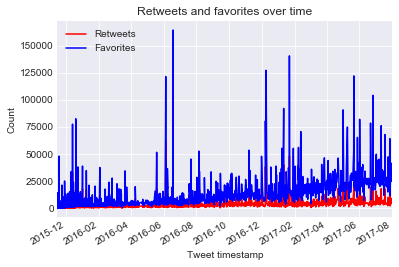

In [276]:
#plotting retweet and favorite count versus time
new_dataframe['retweet_count'].plot(color = 'red', label='Retweets')
new_dataframe['favorite_count'].plot(color = 'blue', label='Favorites')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.show()

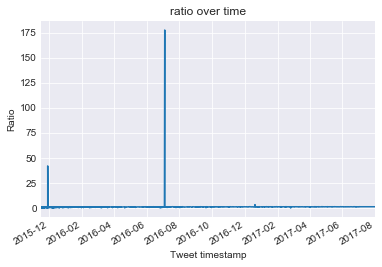

In [277]:
#plotting ratio_numerator versus time
new_dataframe['ratio'].plot()
plt.xlabel('Tweet timestamp')
plt.ylabel('Ratio')
plt.title('ratio over time')
plt.show()

plt.style.use('seaborn-darkgrid')

plt.show()

Dog  which is more popular in the month of 07-2017.

In [278]:
#Which was the most common dog name in the dataset?
new_dataframe['name'].value_counts()[:10]

None       1288
Charlie    20  
Oliver     20  
Lucy       20  
Cooper     20  
Penny      18  
Tucker     18  
Sadie      16  
Winston    16  
Lola       14  
Name: name, dtype: int64

Charlie is more popular followed by Oliver and Lucy.

In [279]:
#Which were the most common dog ratings?
new_dataframe['rating_numerator'].value_counts()[:10]

12.0    897
10.0    836
Name: rating_numerator, dtype: int64

The most rated a dogs are 12,10

In [280]:
#Which was the most used Twitter app to post tweets by WeRateDogs?#
twitter_archive_copy['source'].value_counts() / len(twitter_archive_copy) * 100

Twitter for iPhone    98.091411
Twitter Web Client    1.406328 
TweetDeck             0.502260 
Name: source, dtype: float64

Tweets are more from iphone which is upto 98%

Reference:https://github.com/kdow/WeRateDogs/blob/master/wrangle_act.ipynb